In [ ]:
#linear Regression model to take business dscion  in future based on the predcition

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visulaisation lib
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt #ploting
import statsmodels.formula.api as smf

In [2]:
house = pd.read_csv(r"E:\guvi BA\project BA\house_builder.csv",sep=",")
#file path

In [3]:
print(house.head())
house.info()
#to know information present in given data

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
house.drop(['id','date','yr_built'],axis = 1, inplace= True)

In [5]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [62]:
#p = sns.pairplot(house)

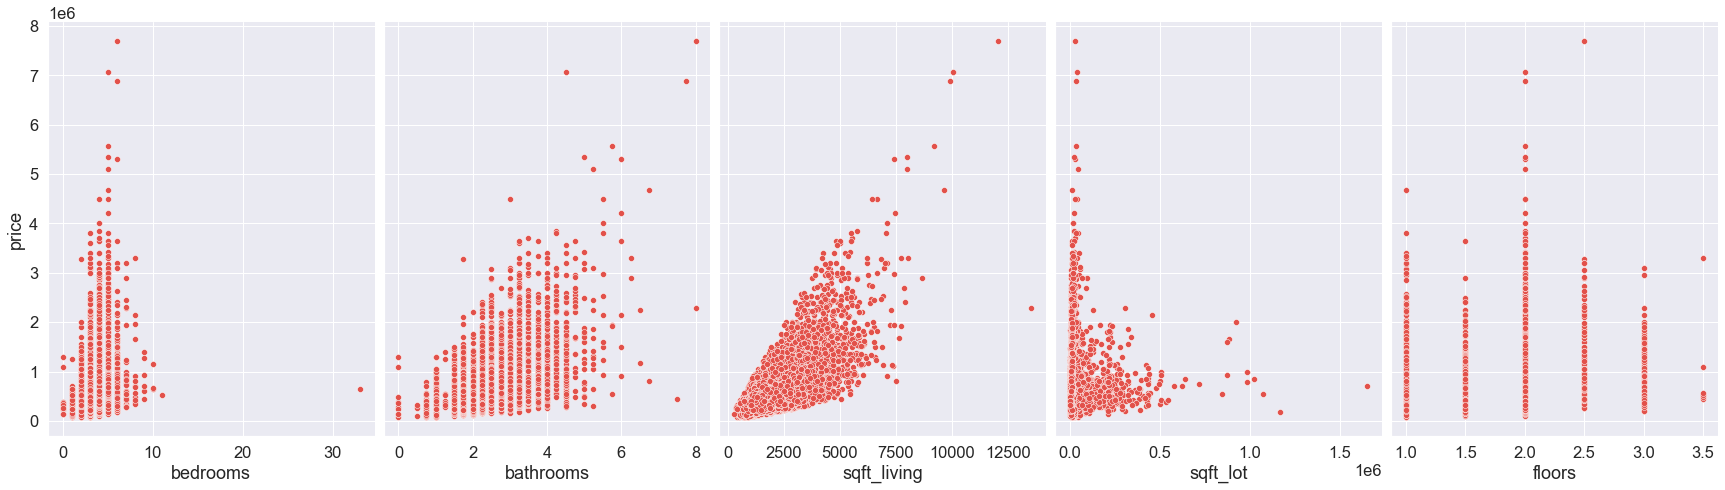

In [8]:
p = sns.pairplot(house, x_vars=['bedrooms','bathrooms','sqft_living','sqft_lot','floors'], y_vars='price', size=7, aspect=0.7)
# visualize the relationship between the features and the response using scatterplots

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

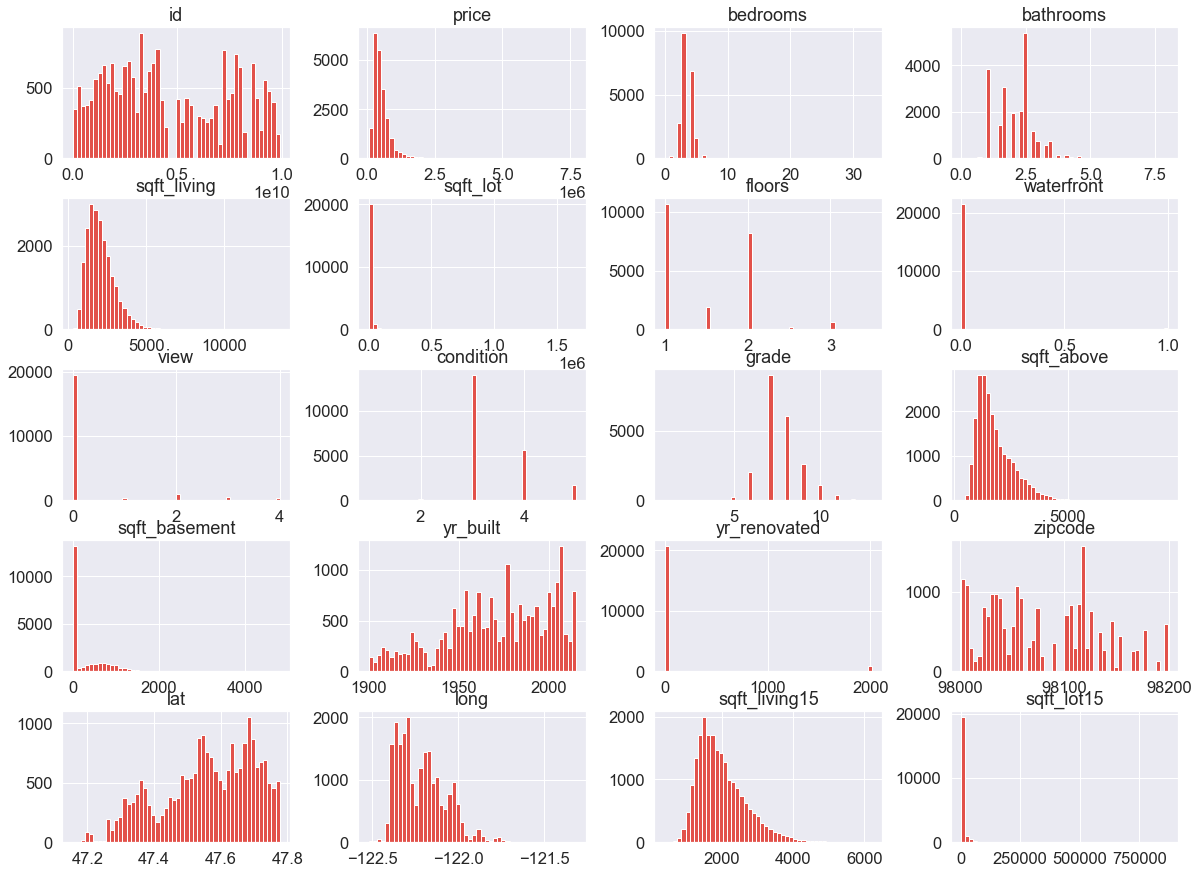

In [22]:
house.hist(bins=50, figsize=(20, 15))

In [24]:
categorical_vars=['date','waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated', 'zipcode']
temp_df=house[categorical_vars].astype('object')
temp_df[categorical_vars].describe()

,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
count,21613,21613,21613,21613,21613,21613,21613,21613
unique,372,2,5,5,12,116,70,70
top,20140623T000000,0,0,3,7,2014,0,98103
freq,142,21450,19489,14031,8981,559,20699,602


In [9]:
x = house.drop(["price"],axis=1)
y = house.price

In [10]:
model=smf.ols(formula="price ~ sqft_lot+sqft_living+bedrooms",data=house)

In [11]:
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7455.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:07:28   Log-Likelihood:            -2.9993e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.278e+04   6603.510     12.536      0.000    6.98e+04    9.57e+04
sqft_lot       -0.3818      0.043     -8.866      0.000      -0.466      -0.297
sqft_living   317.9358      2.376    133.801      0.000     313.278     322.593
bedrooms     -5.88e+04   2312.351    -25.428      0.000   -6.33e+04   -5.43e+04
==============================================================================
Omnibus:                    14339.911   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           481368.337
Skew:                           2.714   Prob(JB):                         0.00
Kurtosis:                      25.474   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

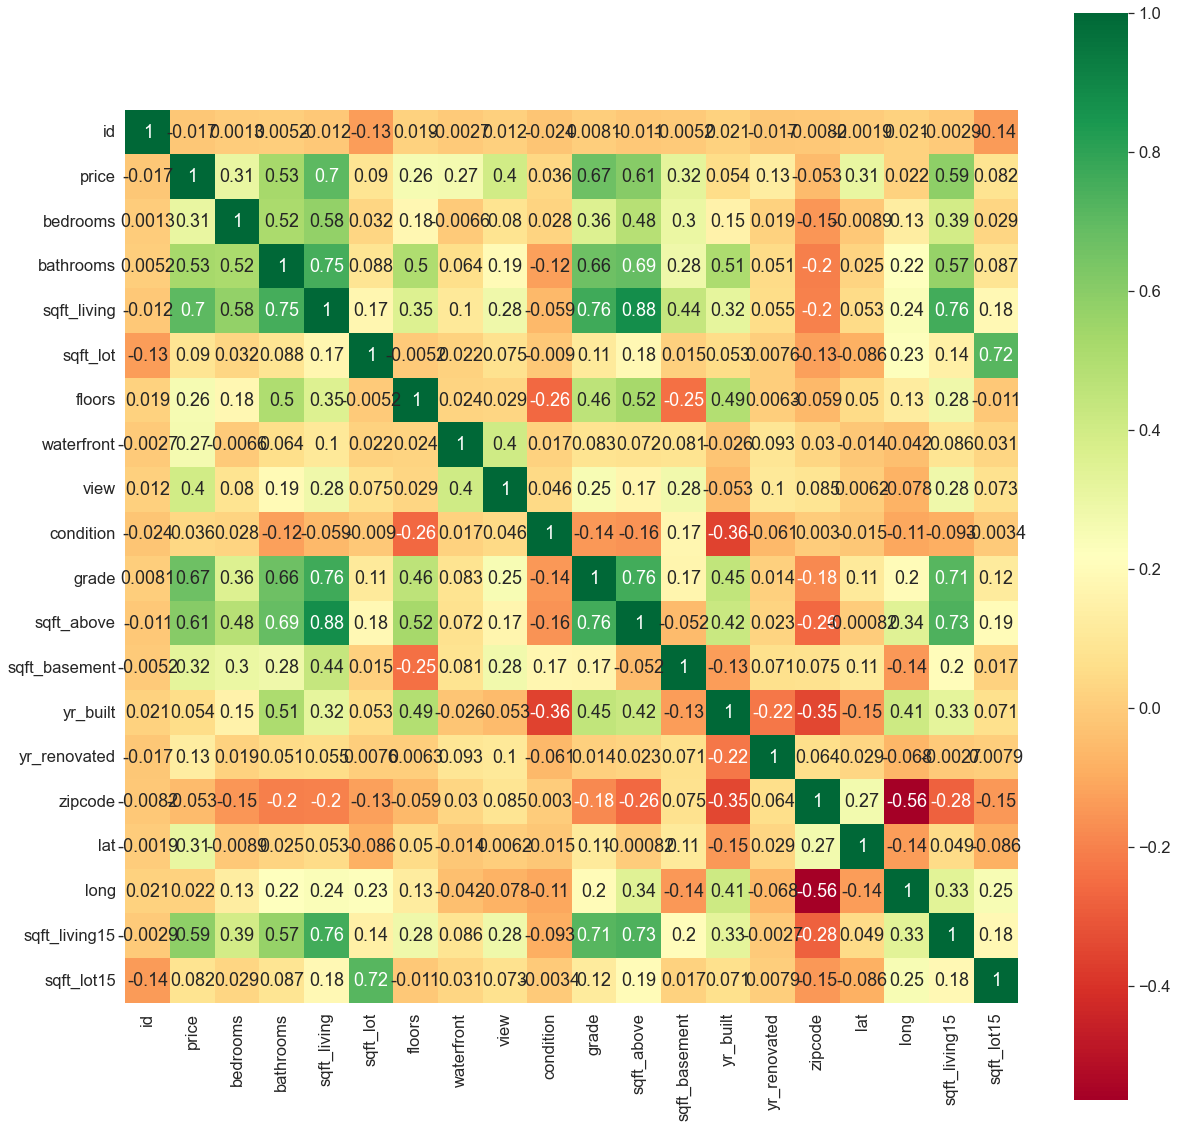

In [25]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(house.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [60]:
#spliting Data sEt

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [30]:
y_pred = lin_reg.predict(X_test)
y_pred

array([ 432834.66507967, 1511050.66507967,  464570.66507967, ...,
        745866.66507967,  253354.66507967,  582794.66507967])

In [32]:
Actual=pd.DataFrame(y_test)

In [33]:
Predicted=pd.DataFrame(y_pred)

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(Actual,Predicted))
print('MSE', metrics.mean_squared_error(Actual,Predicted))
print('RMSE', np.sqrt(metrics.mean_squared_error(Actual,Predicted)))

MAE 128708.6105259706
MSE 43653237665.42122
RMSE 208933.57237510016


In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

print("R squared score for Linear Regression: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))

R squared score for Linear Regression: 0.6713862956704373


In [39]:
print("Adjusted R squared score for Linear Regression: {}".format(1 - (1-lin_reg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)))

Adjusted R squared score for Linear Regression: 0.6814051484715218


In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
house_filepath = r"E:\guvi BA\project BA\house_builder.csv"
house = pd.read_csv(house_filepath, na_values = ["?"]).dropna()
model=smf.ols(formula="price ~ sqft_lot+sqft_living+bedrooms",data=house)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7455.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:24:53   Log-Likelihood:            -2.9993e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.278e+04   6603.510     12.536      

In [41]:
#decision tree

In [42]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [44]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
print('The accuracy of Decision Tree Classifier is: ', dt.score(X_test,y_test))


The accuracy of Decision Tree Classifier is:  0.01147298297557365


In [47]:
#random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, criterion='squared_error',max_depth=5,min_samples_split=4,
min_samples_leaf=3)

#n_estimators mean n forests

In [50]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=200)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


predicted=rf.predict(X_test)
print("Mean squared error for Random Forest: %.2f" % mean_squared_error(y_test, predicted))
print("R Square score for Random Forest: %.2f" % r2_score(y_test, predicted))

Mean squared error for Random Forest: 28550436721.11
R Square score for Random Forest: 0.79


[Text(0.5225409836065574, 0.9166666666666666, 'X[8] <= 0.717\nsquared_error = 130648465602.82\nsamples = 10243\nvalue = 542770.371'),
 Text(0.26229508196721313, 0.75, 'X[13] <= -0.187\nsquared_error = 39048395795.73\nsamples = 8223\nvalue = 440428.979'),
 Text(0.13114754098360656, 0.5833333333333334, 'X[2] <= -0.158\nsquared_error = 14292959960.609\nsamples = 3411\nvalue = 317581.556'),
 Text(0.06557377049180328, 0.4166666666666667, 'X[2] <= -0.915\nsquared_error = 6911788600.814\nsamples = 2116\nvalue = 271101.037'),
 Text(0.03278688524590164, 0.25, 'X[6] <= 2.957\nsquared_error = 5381372825.534\nsamples = 684\nvalue = 228292.622'),
 Text(0.01639344262295082, 0.08333333333333333, 'squared_error = 4167770411.968\nsamples = 676\nvalue = 224855.049'),
 Text(0.04918032786885246, 0.08333333333333333, 'squared_error = 20565653541.667\nsamples = 8\nvalue = 527075.0'),
 Text(0.09836065573770492, 0.25, 'X[13] <= -0.349\nsquared_error = 6386433516.679\nsamples = 1432\nvalue = 290762.717'),
 Tex

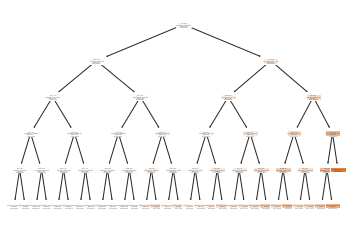

In [53]:
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0],filled=True)

In [54]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

In [58]:
from sklearn.model_selection import cross_val_score


forest_scores = cross_val_score(rf, X_train,y_train,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [182166.76369981 208356.79092039 169552.41021472 156509.87255825
 187857.51183996 189857.30995679 164875.29488446 164552.17849563
 180168.85898953 157398.60887018]
Mean: 176129.56004296994
Standard Deviation: 15675.101152780011
